## CS230 Deep Learning  | Model Baseline 

Fall 2019: Sheun Aluko, Surya Narayanan, Vadim Piccini

Note: util.py defines several utilities for loading and processing raw data, ml_helpers defines ml specific functions

In [ ]:
# conventional imports 
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
import matplotlib.pyplot as plt
keras = tf.keras

#custom imports 
import util as u
import ml_helpers as ml 
import reloader  

# The reloader object allows reloading of source code after modifications are made 
r = reloader.Reloader(["util","ml_helpers"]) 
r.reload() 

In [ ]:
#set params
batch_size=8
num_epochs=200 
data_fraction = 0.05

In [ ]:
#load data 
data = u.data_load(f=data_fraction)
print("Train Size: {}\nVal Size: {}".format(str(len(data[0])),str(len(data[2]))) )  

In [ ]:
# RUN THE MODEL 
result = ml.run_model(data=data,batch_size=batch_size,num_epochs=num_epochs) 

In [ ]:
result['time_info']

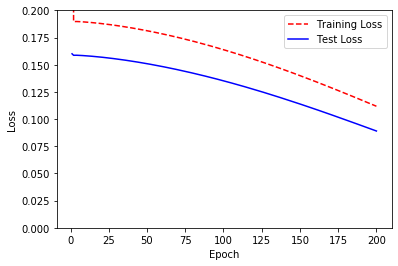

<Figure size 432x288 with 0 Axes>

In [6]:
ml.train_curve(result['train_info'],result['name']) 